# **KSP 5.0 Selection Assignment**





In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Section 1: Calculating the Redshift of Galaxies

You are given the data for all the galaxies in the cluster in the file 'galaxy.csv'.

This includes the name of the galaxy, observed wavelength of the $H\alpha$ line $\lambda_{H\alpha}$, Right Ascension at J2000.0 and Declination and J2000.0 (You can read more about RA and Dec [here](https://en.wikipedia.org/wiki/Equatorial_coordinate_system))

In [2]:
galaxy_data = pd.read_csv('data/galaxy.csv')


Since the galaxies would have some radial velocities with respect to us, the wavelengths we observed would be [redshifted](https://en.wikipedia.org/wiki/Redshift) due to doppler effect.

Using the value of the Observed Wavelength of $H\alpha$ line (Rest Wavelength $\lambda_{H\alpha0} = 6562.8nm)$, calculate the redshift of the galaxies in our cluster.

Use this to find their radial velocities of the galaxies and plot it.

(Assume that the observed wavelength has been corrected for the motion of earth around sun, and motion of sun around the center of Milky Way. Put more simply, these are the wavelengths you would have observed if you were at rest at the center of Milky Way)

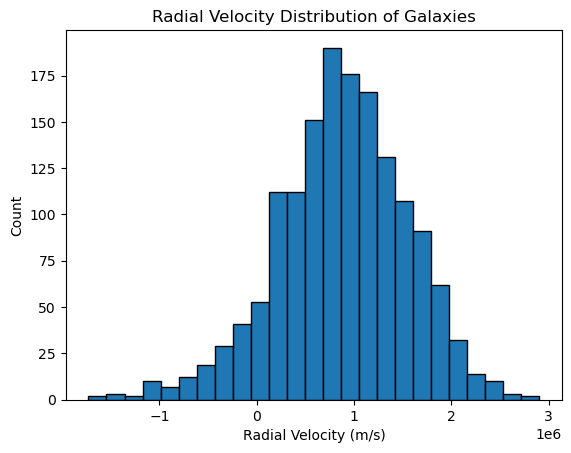

In [3]:
#rest wavelenght
rest_wavelenght=6562.8

#calculating radial velocities
galaxy_data['Red shift']=(galaxy_data['Observed Wavelength of H-alpha']-rest_wavelenght)/rest_wavelenght #redshift
c=299792458 #speed of light
galaxy_data['Radial velocities']=c*galaxy_data['Red shift'] #radial velocity

#plotting radial velocity ranges vs count
plt.hist(galaxy_data['Radial velocities'], bins=25, edgecolor='black')
plt.xlabel('Radial Velocity (m/s)')
plt.ylabel('Count')
plt.title('Radial Velocity Distribution of Galaxies')
plt.show()

Using the data from galaxy.csv, answer the following questions.

For your convenience, the RA and Dec data has been converted from the format $a^\circ b^m c^s$ to $xx^\circ$ below


In [17]:
#adding two colomns of degree instead
temp = galaxy_data['RA J2000.0'].str.split(' ', expand=True)
galaxy_data['RA J2000.0 deg'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600
temp = galaxy_data['Dec J2000.0'].str.split(' ', expand=True)
galaxy_data['Dec J2000.0 deg'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600

In [5]:
#for 1.1 approx angular size original
x0,y0=np.average(galaxy_data['RA J2000.0 deg']),np.average(galaxy_data['Dec J2000.0 deg']) #center of cluster
print("The center of cluster is RA , Dec in degree = ", x0,",", y0) 

#assuming cartesian like coordinates:
p=0 #initializing size
for i,j in zip(galaxy_data['RA J2000.0 deg'], galaxy_data['Dec J2000.0 deg']): #all coordinates (RA,Dec) in degree
    if ((i-x0)**2+(j-y0)**2)**0.5>p:
        p=((i-x0)**2+(j-y0)**2)**0.5

print("Assuming cartersian like coordinates the angular size of the cluser(degree) = ",p)

#calculation for spehrical surfaces
#defining the haversine
def haversine(ra1, dec1, ra2, dec2):
    ra1, dec1, ra2, dec2 = map(np.radians, [ra1, dec1, ra2, dec2])
    d_ra = ra2 - ra1
    d_dec = dec2 - dec1
    a = np.sin(d_dec/2)**2 + np.cos(dec1) * np.cos(dec2) * np.sin(d_ra/2)**2
    b = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return b

s=0 #size of cluster initialization 
for i,j in zip(galaxy_data['RA J2000.0 deg'], galaxy_data['Dec J2000.0 deg']):  #all coordinates (RA,Dec) in degree
    if haversine(i,j,x0,y0)>s:
        s=haversine(i,j,x0,y0)

#approximating angular size of galaxy cluster
theta=s*180/np.pi
print("The angular size of the cluser(degree) from haversine =",theta)

The center of cluster is RA , Dec in degree =  12.484632021253521 , 10.295171510156871
Assuming cartersian like coordinates the angular size of the cluser(degree) =  18.648320748957232
The angular size of the cluser(degree) from haversine = 18.6477176680254


### Q1.1. What is the approximate angular size of the galaxy cluster?

Answer: The approximate angular size of the galaxy cluster is $18.6477176680254^\circ$.

***

### Q1.2. Can you comment anything about the rotation of the galaxies around the center of the cluster.
HINT: You may find it useful to plot a scatter plot of RA and DEC with radial velocity as colormap.

Answer: Upon analyzing the galaxy cluster, I observed the following patterns:

1. Galaxy Concentration: Most galaxies are concentrated around the center of the cluster, with a majority having relatively low radial velocities.

2. Radial Velocity Trend: As the distance from the center increases, the radial velocities tend to increase, which is opposite of [what is seen in our solar system.](https://public.nrao.edu/ask/which-planet-orbits-our-sun-the-fastest/)

3. Velocity Correlation: The radial velocities appear to be more strongly correlated with Declination (Dec) than Right Ascension (RA), although this observation should be interpreted cautiously due to the different ranges of Dec and RA values.

4. Velocity Directionality: The radial velocities have different directions depending on their Dec values, with galaxies above/below the center of the cluster generally moving away from/towards us, respectively. This suggests that the galaxy cluster may be moving as a whole, and there could be local groups or smaller clusters forming in the future.

5. Velocity Distribution: The radial velocity distribution appears approximately normal, indicating symmetry in the galaxy cluster.

6. Rotation Pattern: The pattern of radial velocities suggests that the cluster may be rotating as a whole, with the potential rotation axis aligned roughly along the north-south direction on the sky. However, the rotation pattern is not entirely coherent, especially in the central region.

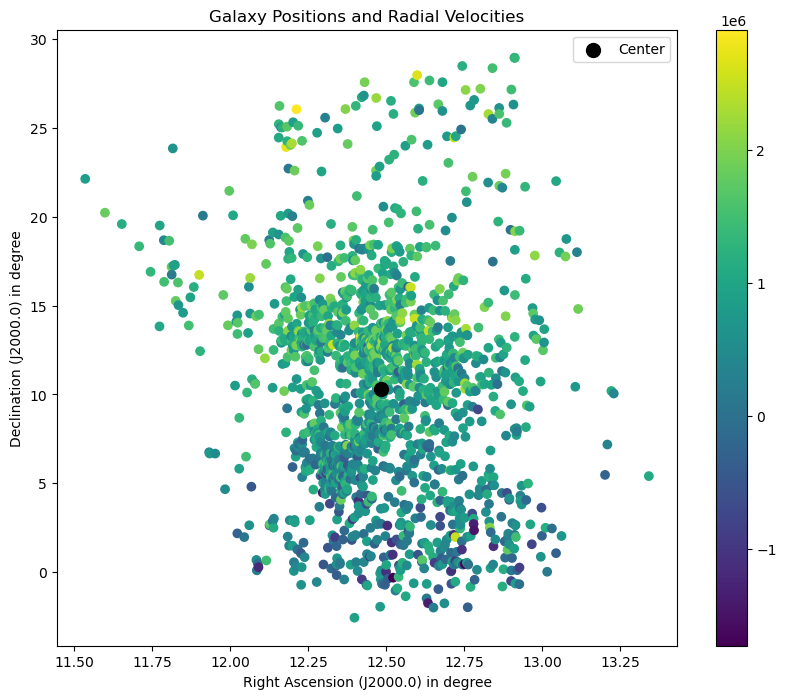

In [6]:
#scatter plot of RA and Dec, colored by radial velocity
plt.figure(figsize=(10, 8))
scatter=plt.scatter(galaxy_data['RA J2000.0 deg'], galaxy_data['Dec J2000.0 deg'],c=galaxy_data['Radial velocities']) #galaxies with velocity as colour

plt.scatter(x0, y0, s=100, c='Black', label='Center') #center

plt.colorbar(scatter) #velocity colour bar

#labels
plt.xlabel('Right Ascension (J2000.0) in degree')
plt.ylabel('Declination (J2000.0) in degree')
plt.title('Galaxy Positions and Radial Velocities')
plt.legend()

plt.show()

***
#Section 2: Calibrating Cepheids Data

NOTE: Although there are no prerequisities for this section, it relies a bit on knowledge about cepheids and their Period-Luminosity Relation. Necessary resource links have been provided wherever needed. You are strongly encouraged to use the internet to aid as a reference whenever needed.
***

The [Gaia Mission](https://en.wikipedia.org/wiki/Gaia_spacecraft) aims at cataloging and create a precise three-dimensional map of astronomical objects throughout the Mily Way. It maps the motion of the stars, which encode the origin and subsequent evolution of the Milky Way. The spectrophotometric measurements provide detailed physical properties of all stars observed, characterizing their luminosity, effective temperature, gravity and elemental composition.





In [15]:
gaia_data = pd.read_csv('data/gaia.csv')

Cepheids are a particular type of variable stars that pulsates radially, varying in both diameter and temperature. They **changes in brightness**, with a **well-defined stable period and amplitude**.

The file 'gaia.csv' includes data for about 5000 Cepheid Variable Stars in our own galaxy. In particular, the file contains the following data fields:
   
*   Unique ID of the Source Star
*   Parallax (in milli arcseconds) : You can read more about parallax [here](https://en.wikipedia.org/wiki/Stellar_parallax)
*   Mean **Apparent** Magnitude ($m$)
*   TIme period of Pulsations P(in days)



Classical Cepheids follow the [Period Luminosity Law](https://en.wikipedia.org/wiki/Period-luminosity_relation#The_relations), also commonly known as the Leavitt Law.

It basically states that there is an empirical relation between the pulsation period $(P)$ of a Cepheid Star and it's **Absolute Magnitude** ($M$) of the form -

#### $\begin{equation}M = \alpha \log_{10}(P \text{(in days)}) + \beta \end{equation}$
***

### Your aim is to verify Leavitt Law for cepheids using the given data, and find the values of $\alpha$ and $\beta$.

You may find it helpful to use the function 'poly_fit' in numpy for this.

The value of alpha is:  -1.7501625568866077
The value of beta is:  0.4529616510303395


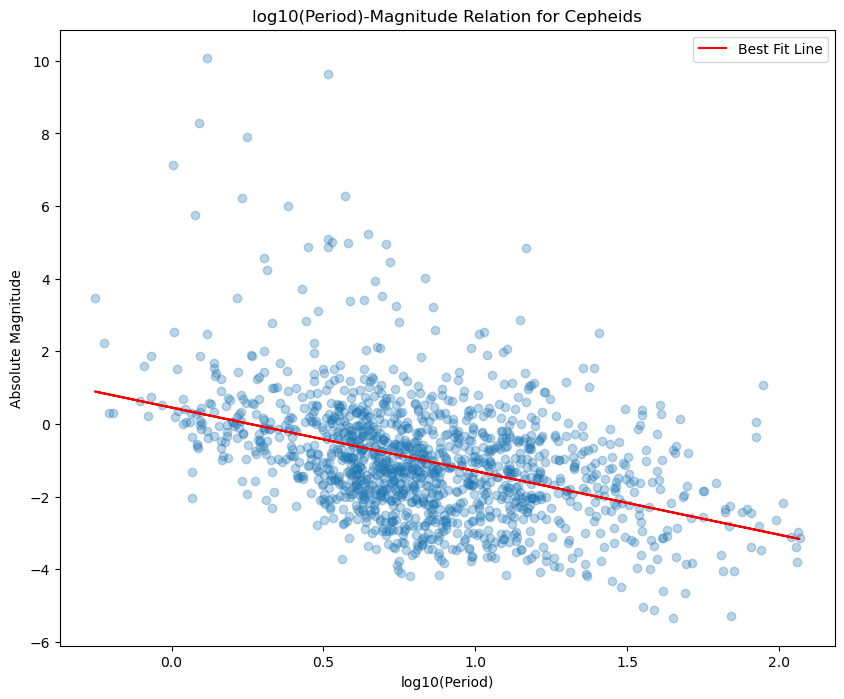

In [8]:
# Convert the period to log10(P)
gaia_data['log10(P)']=np.log10(gaia_data['time period'])

#Addding a colomn of absolute magnitude M   
gaia_data['absolute magnitude']=gaia_data['mean apparent magnitude']+5-5*np.log10(1000/(gaia_data['parallax']))

# Best fit calculation
coeffs=np.polyfit(gaia_data['log10(P)'], gaia_data['absolute magnitude'],1)
alpha,beta=coeffs

print("The value of alpha is: ", alpha)
print("The value of beta is: ", beta)

# Data scatter and best fit line
plt.figure(figsize=(10, 8))

plt.scatter(gaia_data['log10(P)'], gaia_data['absolute magnitude'], alpha=0.3)

plt.plot(gaia_data['log10(P)'], alpha*gaia_data['log10(P)']+beta, color='Red', label='Best Fit Line')

plt.xlabel('log10(Period)')
plt.ylabel('Absolute Magnitude')
plt.title('log10(Period)-Magnitude Relation for Cepheids')
plt.legend()
plt.show()

Therefore, leavitt law is verified for the given data.

The equation is:
### $$M ≈ -1.75 log_{10}(P \text{in days}) + 0.45$$

### Some useful information about the Magnitude system

The brightness of a star as seen by some observer is dependent on the observer's distance from the star as well as the intrinsic brightness of the star (ignoring any absorption in the intervening space).

In astronomy, brightness of a star, as seen by some observer, is measured in terms of its **apparent magnitude ($m$)**. For two stars (1 and 2) with fluxes $f_1$ and $f_2$ respectively, their apparent magnitudes $m_1$ and $m_2$ are related by:

$m_1 - m_2 = 2.5 \log_{10} \left( \frac{f_1}{f_2} \right)$

**Absolute magnitude ($M$)** of any star is its apparent magnitude if the star was exactly 10 parsecs away from the observer. Thus, $M$ only depends on the intrinsic brightness of the star.

***

# Section 3: Getting the distances to our galaxies

Now that we have our period-luminosity relation, we can observe cepheids in the galaxies in our cluster and use this to get the distances to our galaxies. (Yes, this is possible! Hubble Telescope actually observed Cepheids in the galaxies in Virgo Cluster)


For this, you have been given the data file 'cepheid.csv' which contains the following data fields:
*   Unique ID of the Cepheid
*   Name of the Galaxy to which it belongs
*   Mean Apparent Magnitude (m)
*   Time Period of Pulsation (in days)

In [16]:
cepheid_data = pd.read_csv('data/cepheid.csv')

Use the Period-Luminosity Law derived in Section-2 and the above data to find an estimate for the distance to each galaxy in the cluster.

Make sure to handle outliers in the above data. The data may contain some cepheids that actually DO NOT belong to the given galaxy, but it just seems to us that this is the case since they fall along the same line of sight.


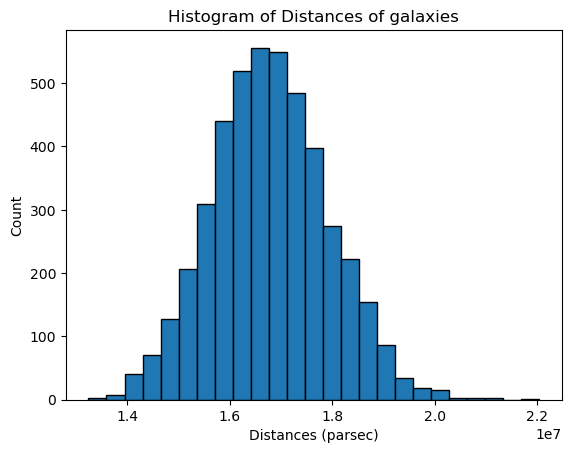

In [57]:
#using the best fit line from section2 to find absolute magnitudes
cepheid_data['Absolute Magnitude']=alpha*np.log10(cepheid_data['Period'])+beta 

#using the apparent, real magnitude relation
cepheid_data['Distance']=10**((cepheid_data['Apparent Magnitude']-cepheid_data['Absolute Magnitude'])/5+1)

#Statistical parameters of Distances
mean_dist=np.mean(cepheid_data['Distance'])
std_dist=np.std(cepheid_data['Distance'])
z_scores=[(x - mean_dist) / std_dist for x in cepheid_data['Distance']]

#refining distances
outliers=[x for x, z in zip(cepheid_data['Distance'], z_scores) if abs(z) > 3] #list of ouliers in distances
Distances=[i for i in cepheid_data['Distance'] if i not in outliers] #Refined distances list

#histogram of distances
plt.hist(Distances,bins=25,edgecolor='black')
plt.title("Histogram of Distances of galaxies")
plt.xlabel("Distances (parsec)")
plt.ylabel("Count")
plt.show()

***
# Section 4: Getting the Hubble's Constant

The famous [Hubble's Law](https://en.wikipedia.org/wiki/Hubble%27s_law) is the observation that galaxies are moving away from Earth at speeds proportional to their distance.

$v = H_0 d$

where $H_0$ is the proportionalaity constant, also known as the Hubble's Constant.

Now that we have an estimate for the radial velocities and distance to the galaxies in our cluster, we need to find an estimate of the Hubble Constant (H).

Fit gaussians on your velocity and distance data and report the mean and standard deviation of the same. Also plot the histograms and the fitted gaussian.

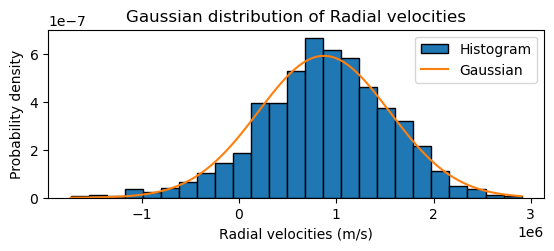

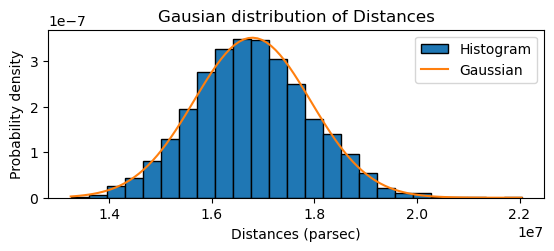

The value of Hubble's constant from the gausians (km/s/Mpc) = 52.02923663621856 +- 40.33549836831975


In [26]:
#Fitting Gaussian on velocity and distance data
mean_v, std_v = norm.fit(galaxy_data['Radial velocities'].values)
mean_d,std_d=norm.fit(Distances)

plt.subplot(2,1,1)
plt.hist(galaxy_data['Radial velocities'], bins=25, label="Histogram",edgecolor='Black',density=True)
x = np.linspace(min(galaxy_data['Radial velocities']), max(galaxy_data['Radial velocities']), 100)
plt.plot(x,norm.pdf(x,mean_v,std_v),label="Gaussian")
plt.title("Gaussian distribution of Radial velocities")
plt.xlabel("Radial velocities (m/s)")
plt.ylabel("Probability density")
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.hist(Distances, bins=25,label="Histogram", edgecolor='Black',density=True)
x = np.linspace(min(Distances), max(Distances), 100)
plt.plot(x,norm.pdf(x,mean_d,std_d),label="Gaussian")
plt.title("Gausian distribution of Distances")
plt.xlabel("Distances (parsec)")
plt.ylabel("Probability density")
plt.legend()
plt.show()

#hubble's constant is
H=mean_v*1000/mean_d

#error propogation for Hubble's constant
dH = np.sqrt((1000/mean_d)**2*(std_v**2)+(-mean_v*1000/(mean_d** 2))**2*(std_d**2))

print("The value of Hubble's constant from the gausians (km/s/Mpc) =",H,"+-",dH)

***

#### Q4.1 Compare the value of $H$ that you got from the standard $H_0$ commonly accepted today. The estimate that you got - is it the same (within error margins), higher or lower than the value of $H_0$.

Answer: The value obtained of $H$ from data analysis = $52.03 \text{ km} \, \text{s}^{-1} \, \text{Mpc}^{-1} \pm 40.34 \text{ km} \, \text{s}^{-1} \, \text{Mpc}^{-1}$

Which is not significantly different from the [accepted value](https://www.britannica.com/science/Hubble-constant) of  $H_0 = 67 \text{ km} \, \text{s}^{-1} \, \text{Mpc}^{-1}$, given the large error margin.

***

#### Q4.2 What might be the reason behind this difference in values

Answer: The difference in values might be due to various reasons, including:

1. Bias in data collection
2. Data not matching theoretical framework (e.g. value of $\alpha$ in the luminosity-magnitude relation)
3. Need for better quality and more quantity of data
4. Possible errors in calculations (although reviewed multiple times)
5. Not considering error bars in the original data
6. Simplistic way of calculating $H$, $dH$ using mean and standard deviation of velocity and distance

Additionally, the large error margin in the estimated value of $H$ suggests that there may be significant uncertainties in the measurements or analysis.

***

# Section 5 : Dark Matter

Dark matter is a component of the universe whose presence is discerned from its gravitational attraction rather than its luminosity.

***

#### Q5.1 ESTIMATE the total mass of the Galaxy Cluster. This includes mass due to visible matter as well as dark matter.

HINT: The [Virial Theorem](https://phys.libretexts.org/Bookshelves/Classical_Mechanics/Variational_Principles_in_Classical_Mechanics_%28Cline%29/02%3A_Review_of_Newtonian_Mechanics/2.11%3A_Virial_Theorem) provides a general equation that relates the average over time of the total kinetic energy of a stable system of discrete particles, bound by a conservative force
 $$ \left<KE\right> = -\frac{1}{2} \left<PE\right> $$


Answer: Using the Virial Theorem, the estimated total mass of the galaxy cluster =  $5.748336795267958 \times 10^{14} \, M_\odot$ ≈  $5.75 \times 10^{14} \, M_\odot$\
(where $M_\odot$ is solar mass)

In [12]:
# Estimating total mass of galaxy cluster
G=6.6743e-11 #gravitational constant

#Kinetic energy/mass
KE_div_m=0.5*std_v**2 

#radius of galaxy cluster in meters
radius=theta*np.pi*mean_d*3.086e+16/180

#Potential energy/mass^2
PE_div_msq=G/radius

#mass of galaxy in kg
m=2*KE_div_m/PE_div_msq
Mass=m/(2e30) #mass in solar masses

print("The total mass of the galaxy cluster from virial theorem (solar masses) =",Mass)

The total mass of the galaxy cluster from virial theorem (solar masses) = 574833679526795.8



***

#### Q5.2 ESTIMATE the visible mass in the galaxy cluster. Use the Mass - Luminosity Relation for Main-Sequence Stars, assuming that it holds well for galaxies too. You may use the Milky Way as a reference.

Absolute Magnitude of Milky Way $ \approx -21 mag$

Visible mass of Milky Way $\approx 2 \times 10 ^ {11} M_{sun}$

Answer: Using the mass luminosity relation, the visible mass of the galaxy cluster=  $1.404160201258712  \times 10^{14} \, M_\odot$ ≈  $1.5\times 10^{14} \, M_\odot$\
(where $M_\odot$ is solar mass)

In [56]:
M_milkyway=-21 #mag
Mass_milkyway=2e11  #solar masses
k=(Mass_milkyway**3.5)*10**(0.4*M_milkyway) #constant of proportionality
c=299792458 #speed of light

#calculating visible mass of galaxies, combination of mass-luminosity and period-magnitude law
masses_galaxies=[]
for i in range(len(galaxy_data['Red shift'])):
    arg=1000*c*np.abs(galaxy_data['Red shift'][i])/H
    magnitude=galaxy_data['Apparent Mag'][i]-5*np.log10(arg)+5
    mass_galaxy=((k*10**(-0.4*magnitude))**(1/3.5))
    masses_galaxies.append(mass_galaxy)

print("The total visible mass of the galaxy (Solar masses) =",sum(masses_galaxies))

The total visible mass of the galaxy (Solar masses) = 140416020125871.2


#### Q5.3 What is the fraction of the total mass of the galaxy cluster that is actually in the form of Dark Matter

Answer: The fraction of total mass which is dark matter = $\frac{5.748336795267958 - 1.404160201258712}{5.748336795267958}$ ≈ $0.7557$

Therefore, the total dark matter of a galaxy cluster is nearly $75.57 \% $
***